In the last lecture we saw the $k$-means algorithm. In this tutorial you are going to use it to cluster songs based on the words inside them. We will need to do some work to get them in a state where we can use them, but the actual use of the $k$-means algorithm is then very simple.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

There is a zip file containing the lyrics of 80 amazing songs (according to Rolling Stone magazine) called `rs_lyrics.zip`. Download it and unzip it. It will make a folder called `rs_lyrics` with the songs inside. The following code will then read then in, and store the songtitle and lyrics in a dataframe.

In [21]:
import os

cols_name = ['Name', 'Lyrics']
df = pd.DataFrame(columns = cols_name)

path = '../../res/rs_lyrics/'
filenames = os.listdir(path)
i=0

for filename in filenames:
    path_file = os.path.join(path, filename)
    mode_read = 'r'
    with open(path_file, mode_read) as file:
        lines = file.read().splitlines()
        fname_notype = filename[:-4]

        df.loc[i] = [fname_notype, lines]
        df['Lyrics'][i] = ' '.join(df['Lyrics'][i])
        i += 1
        
df.head()

,Name,Lyrics
0,yesterday,"Yesterday, all my troubles seemed so far away ..."
1,good_golly_miss_molly,"Good golly, Miss Molly, sure like to ball. Ooh..."
2,sympathy_for_the_devil,Please allow me to introduce myself I'm a man ...
3,summertime_blues,Uh I'm a gonna raise a fuss I'm a gonna raise ...
4,tangled_up_in_blue,Early one mornin' the sun was shinin' I was la...


We have to do a lot of work before we can cluster word data. Ultimately we need to turn the lyrics into some kind of numerical input vector that we can feed into the algorithm. There are a couple of options for this, but we are going to use one called a Bag of Words. Essentially, it counts how often each word gets used in each song, and then the counts form the input vector. These counts are often normalised by the number of words in the song, since otherwise long songs get higher scores than short ones. 

Scikit-learn can make the Bag of Words for us. However, before we do that, there are a few things that we have to do:
- remove punctuation
- make everything lower case
- remove stop words. These are the common words that don't really help much (and, the, etc.) We should remove them, or they will dominate the counts.
- remove short words
- for text files have quite a few '(1)' in them to mark things that we don't care about, so we should remove those.

In fact, scikit-learn will do most of these things for us too, but I thought it might be useful to see some Python code for doing them. 

I've downloaded a list of stopwords from the web, so let's start by reading those:

In [22]:
path = '../../res/stopwords.txt'
access_read = 'r'
with open(path, access_read) as file:
    stopwords = file.read().splitlines()

The following two short functions will remove words form a list, and find all the short (2 letters or less) and long (more than 20 letters) words so that we can remove those as well as the stopwords.

In [25]:
def removeWords(text, removeList):
    lower_cases = text.lower()
    words = lower_cases.strip().split()
    
    return [word for word in words if word not in removeList]

def getShortWords(shortlist, text):
    lower_cases = text.lower()
    words = lower_cases.strip().split()
    
    for word in words:
        word_size = len(word)
        if word_size <= 2 or word_size > 20:
            if word not in shortList:
                shortList.append(word)
    return shortList

In [26]:
import string
shortList = []
df_len = len(df)
for i in range(df_len):
    df["Lyrics"][i] = df["Lyrics"][i].translate(str.maketrans('','','(1)'))
    df["Lyrics"][i] = df["Lyrics"][i].translate(str.maketrans('','','(2)'))
    df["Lyrics"][i] = df["Lyrics"][i].translate(str.maketrans('', '', string.punctuation))
    shortlist = getShortWords(shortlist,df["Lyrics"][i])
print(shortlist)

for i in range(df_len):
    df["Lyrics"][i] = removeWords(df["Lyrics"][i],stopwords)
    df["Lyrics"][i] = " ".join(df["Lyrics"][i])
    df["Lyrics"][i] = removeWords(df["Lyrics"][i],shortlist)
    df["Lyrics"][i] = " ".join(df["Lyrics"][i])
df.head()

['my', 'so', 'it', 'as', 'to', 'oh', 'i', 'in', 'im', 'be', 'a', 'me', 'go', 'an', 'at', 'of', 'if', 'pa', 'is', 'ah', 'uh', 'or', 'aw', 'no', 'do', 'he', 'id', 'on', 'up', 'we', 'ax', 'by', 'ow', 'un', 'am', 'us', 'ya', 'di', 'de', 'ba', 'da', 'ma', 'yo', 'd', 'b', 'ol', 'u', 'k', 'm', 'p', 'l', 'r', 'ho', 'v', 'em', 'tv', 'ha', 'ay', 'bo', 'ee', 'j', 'eh', 'na', 'n', 'o', 'e', 's', 'c', 't']


,Name,Lyrics
0,yesterday,yesterday troubles far away looks theyre stay ...
1,good_golly_miss_molly,good golly miss molly sure like ball ooh good ...
2,sympathy_for_the_devil,allow introduce myself man wealth taste ive lo...
3,summertime_blues,gonna raise fuss gonna raise holler workin sum...
4,tangled_up_in_blue,early mornin sun shinin layin bed wondrin shed...


Now it's your turn. Look up the `TfidVectorizer` in sklearn, and work out how to use it on the Lyrics column. Store the counts of each song in a new dataframe called counts. The output below shows the counts of the 5 most common words. The columns are the 80 songs.  

In [31]:
# convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

x_col = df['Lyrics']
X = vectorizer.fit_transform(x_col)
X_arr = X.toarray()
feature_names = vectorizer.get_feature_names()
counts = pd.DataFrame(data=X_arr, columns=feature_names)

In [32]:
# counts of the 5 most common words
transpose = counts.T
common_words_count = transpose.nlargest(5, 0)
common_words_count

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
yesterday,0.698402,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
mmm,0.455555,0.0,0.10075,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.040674,0.0,0.0
believe,0.186884,0.0,0.00000,0.0,0.0,0.073232,0.0,0.0,0.0,0.0,...,0.636114,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
suddenly,0.169849,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
easy,0.144807,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Now import the `KMeans` algorithm from `sklearn.cluster` and work out how to use that. You will need to pick a number of clusters. There are a lot of other initialisation things too, but you can choose arbitrarily for now, and read up about the options later.

In [37]:
from sklearn.cluster import KMeans
# The number of clusters to form as well as the number of centroids to generate
k = 4

# k-means++: choose initial cluster centers to speed up convergence (hoi tu)
# random: choose n_clusters observations (rows) at random
init = 'k-means++'

# number of time the k-means algorithm will be run with different centroid seeds
# the finial results will be the best output
n_init = 10

# relative tolerance with regards to Frobenius norm of the difference 
# in the cluster centers of 2 consecutive iterations to declare convergence
tolerance = 0.0001

# full: classical EM-style algorithm
# elkan: Elkan variation is more efficient on data with well-defined clusters, by using the trianble inequality
# Elkan: more memory intensive due to the allocatoin of an extra array of shape (n_samples, n_clusters)
algorithm='full'
k_means = KMeans(n_clusters=k, init=init, n_init=n_init, tol=tolerance, random_state=1, algorithm=algorithm)
k_means.fit(counts)

KMeans(algorithm='full', n_clusters=4, random_state=1)

The next function finds the most common words in each cluster. We can then plot the bar chart of these by making the predictions, picking the number of words to use, and then calling that function, and then drawing a bar chart of the resulting dataframe.

In [43]:
def get_top_features_cluster(counts, predictions, nfeatures):
    labels = np.unique(predictions)
    df_1 = []
    for label in labels:
        indices = np.where(predictions==label)
        count = counts[indices]
        
        means = np.mean(count, axis=0)
        
        # Returns the indices that would sort an array.
        means_sorted = np.argsort(means)[::-1][:nfeatures]
        
        features = vectorizer.get_feature_names()
        best_features = [(features[i], means[i]) for i in means_sorted]
        
        data_frame_new = pd.DataFrame(best_features, columns=['features','score'])
        df_1.append(data_frame_new)
    return df_1

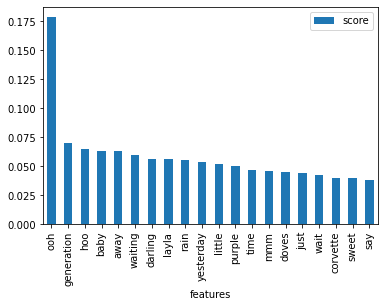

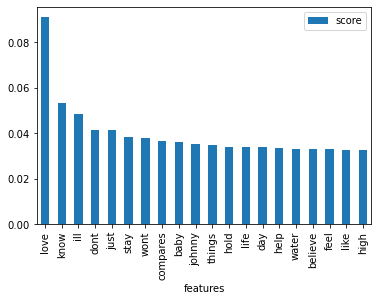

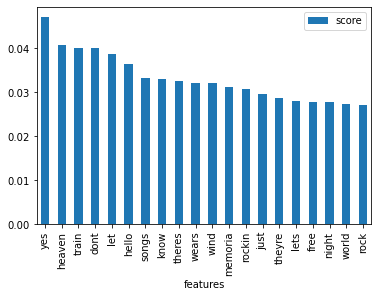

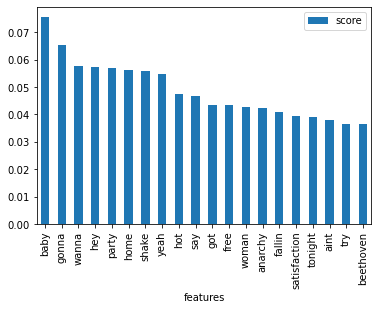

In [44]:
predictions = k_means.predict(counts)
n_features = 20

# convert the DataFrame to a NumPy array
counts_arr = counts.to_numpy()

count_df = get_top_features_cluster(counts_arr, predictions, n_features)
count_df_len = len(count_df)

for i in range(count_df_len):
    count_df[i][:n_features].plot.bar(x='features')

Work out which songs are in which cluster and see if you agree.